In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

plt.rcParams['figure.dpi'] = 300
sns.set_style('whitegrid')
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [4]:
df = pd.read_csv('../data/baseline_scored_small_sample.csv')
df.shape

(8998, 17)

In [14]:
df.describe()

,overall,unixReviewTime,vote,sentiment_score
count,8998.000000,8.998000e+03,1713.000000,8998.000000
mean,2.999555,1.439356e+09,9.738471,2.131233
std,1.699695,6.302907e+07,26.193707,10.054942
min,1.000000,1.002586e+09,2.000000,-75.000000
25%,1.000000,1.410307e+09,2.000000,-0.892857
50%,3.000000,1.449619e+09,3.000000,0.529661
75%,5.000000,1.483661e+09,7.000000,3.040541
max,5.000000,1.537834e+09,391.000000,87.500000


# What is the distribution of sentiment scores across the dataset?

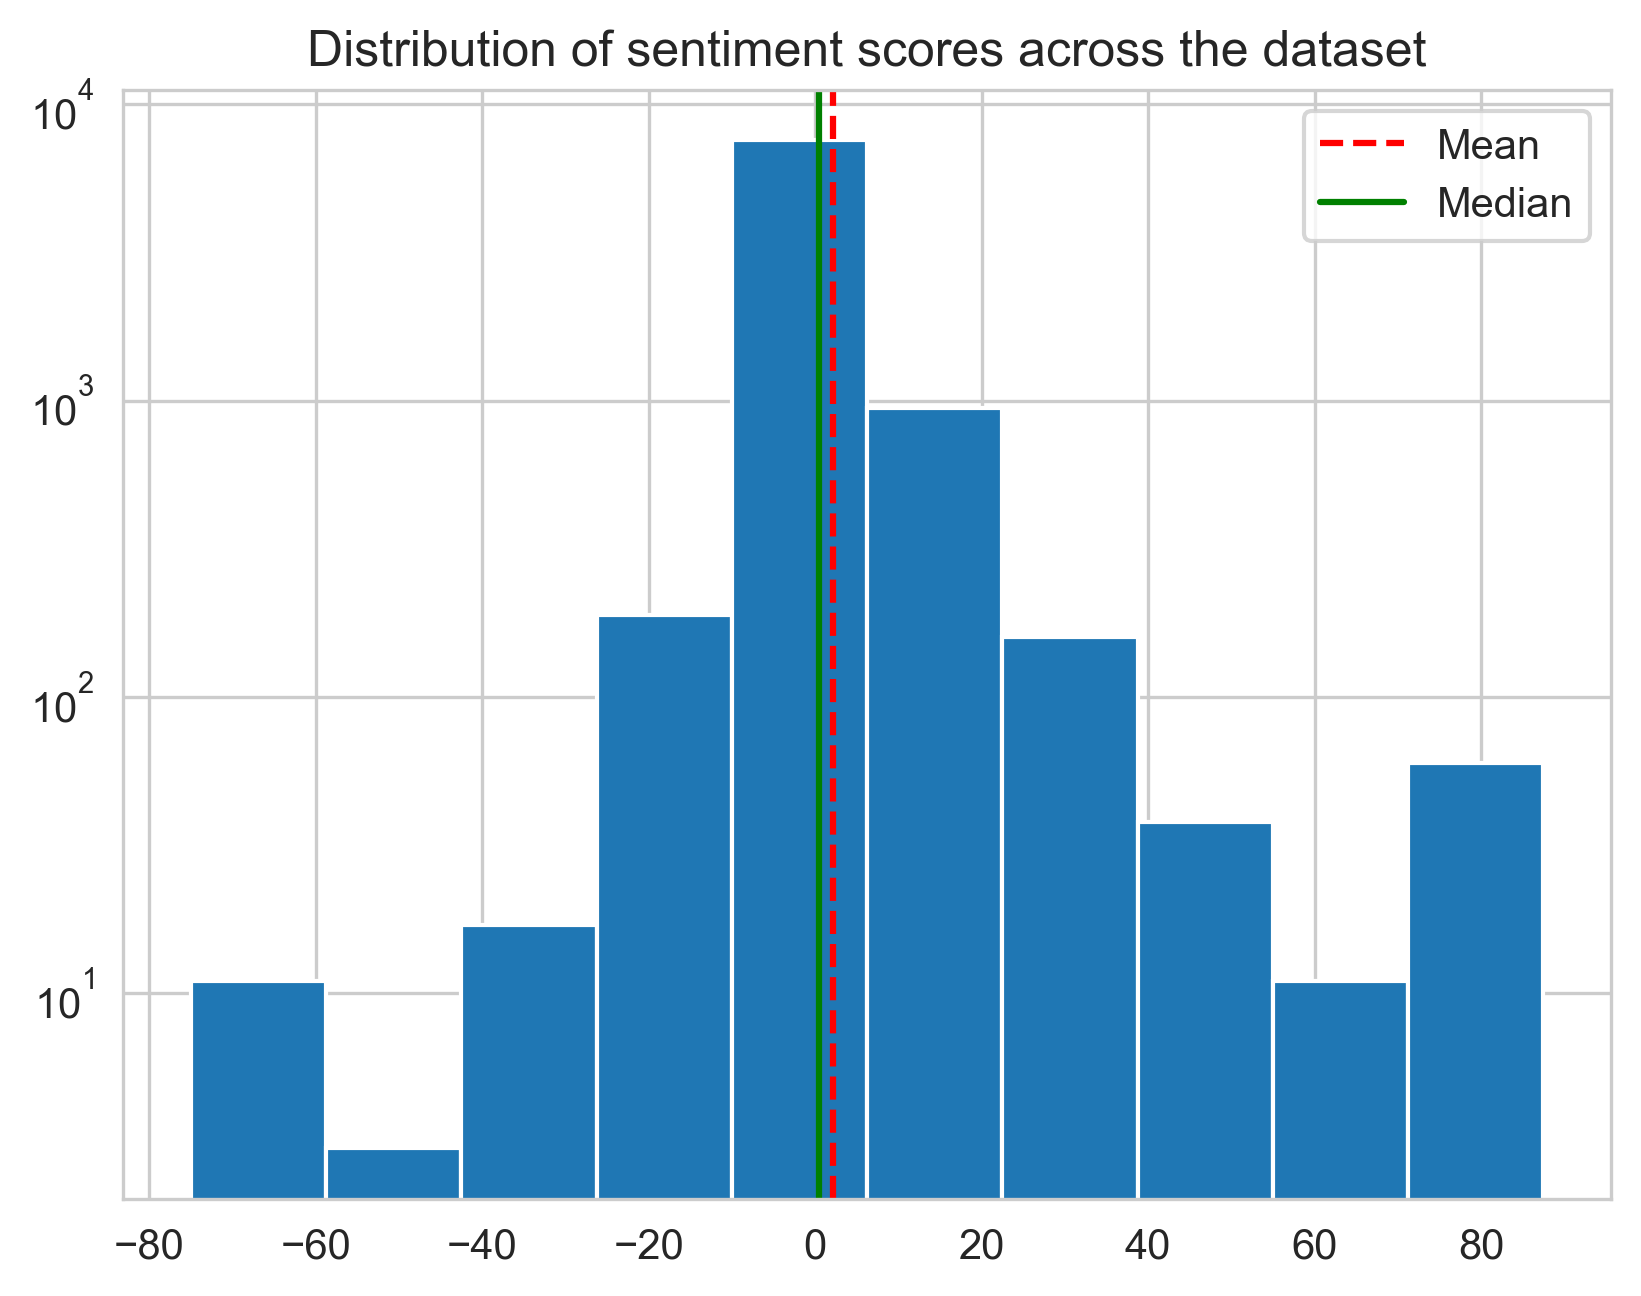

In [18]:
# creating a histogram of the sentiment scores
df['sentiment_score'].hist()
plt.axvline(df['sentiment_score'].mean(), color='r', linestyle='--')
plt.axvline(df['sentiment_score'].median(), color='g', linestyle='-')
plt.legend({'Mean': df['sentiment_score'].mean(), 'Median': df['sentiment_score'].median()})
plt.title('Distribution of sentiment scores across the dataset')
plt.yscale('log')
plt.show()

 a normal distribution with mean and median close to 0 and a wide range of sentiment scores suggests a diverse set of opinions or sentiments expressed in the dataset, ranging from strongly positive to strongly negative, with a balanced distribution around neutral sentiments.

# Correlation Test: Ratings vs Sentiment Scores

In [24]:
# calculating pearson correlation between ratings and sentiment scores
corr_coef, p_value = pearsonr(df['overall'], df['sentiment_score'])
print("Pearson correlation coefficient:", corr_coef)
print("P-value:", p_value)

# calculating spearman correlation between ratings and sentiment scores
corr_coef_spearman, p_value_spearman = spearmanr(df['overall'], df['sentiment_score'])
print("Spearman correlation coefficient:", corr_coef_spearman)
print("P-value (Spearman):", p_value_spearman)

Pearson correlation coefficient: 0.3128022539291719
P-value: 1.920028779219047e-203
Spearman correlation coefficient: 0.4266137593581229
P-value (Spearman): 0.0


- Looking at the Pearson correlation, it shows weak positive correlation and the P-value suggest that it is not statistically significant
- Spearman correlation also suggests that there is weak positive correlation between ratings and sentiment scores

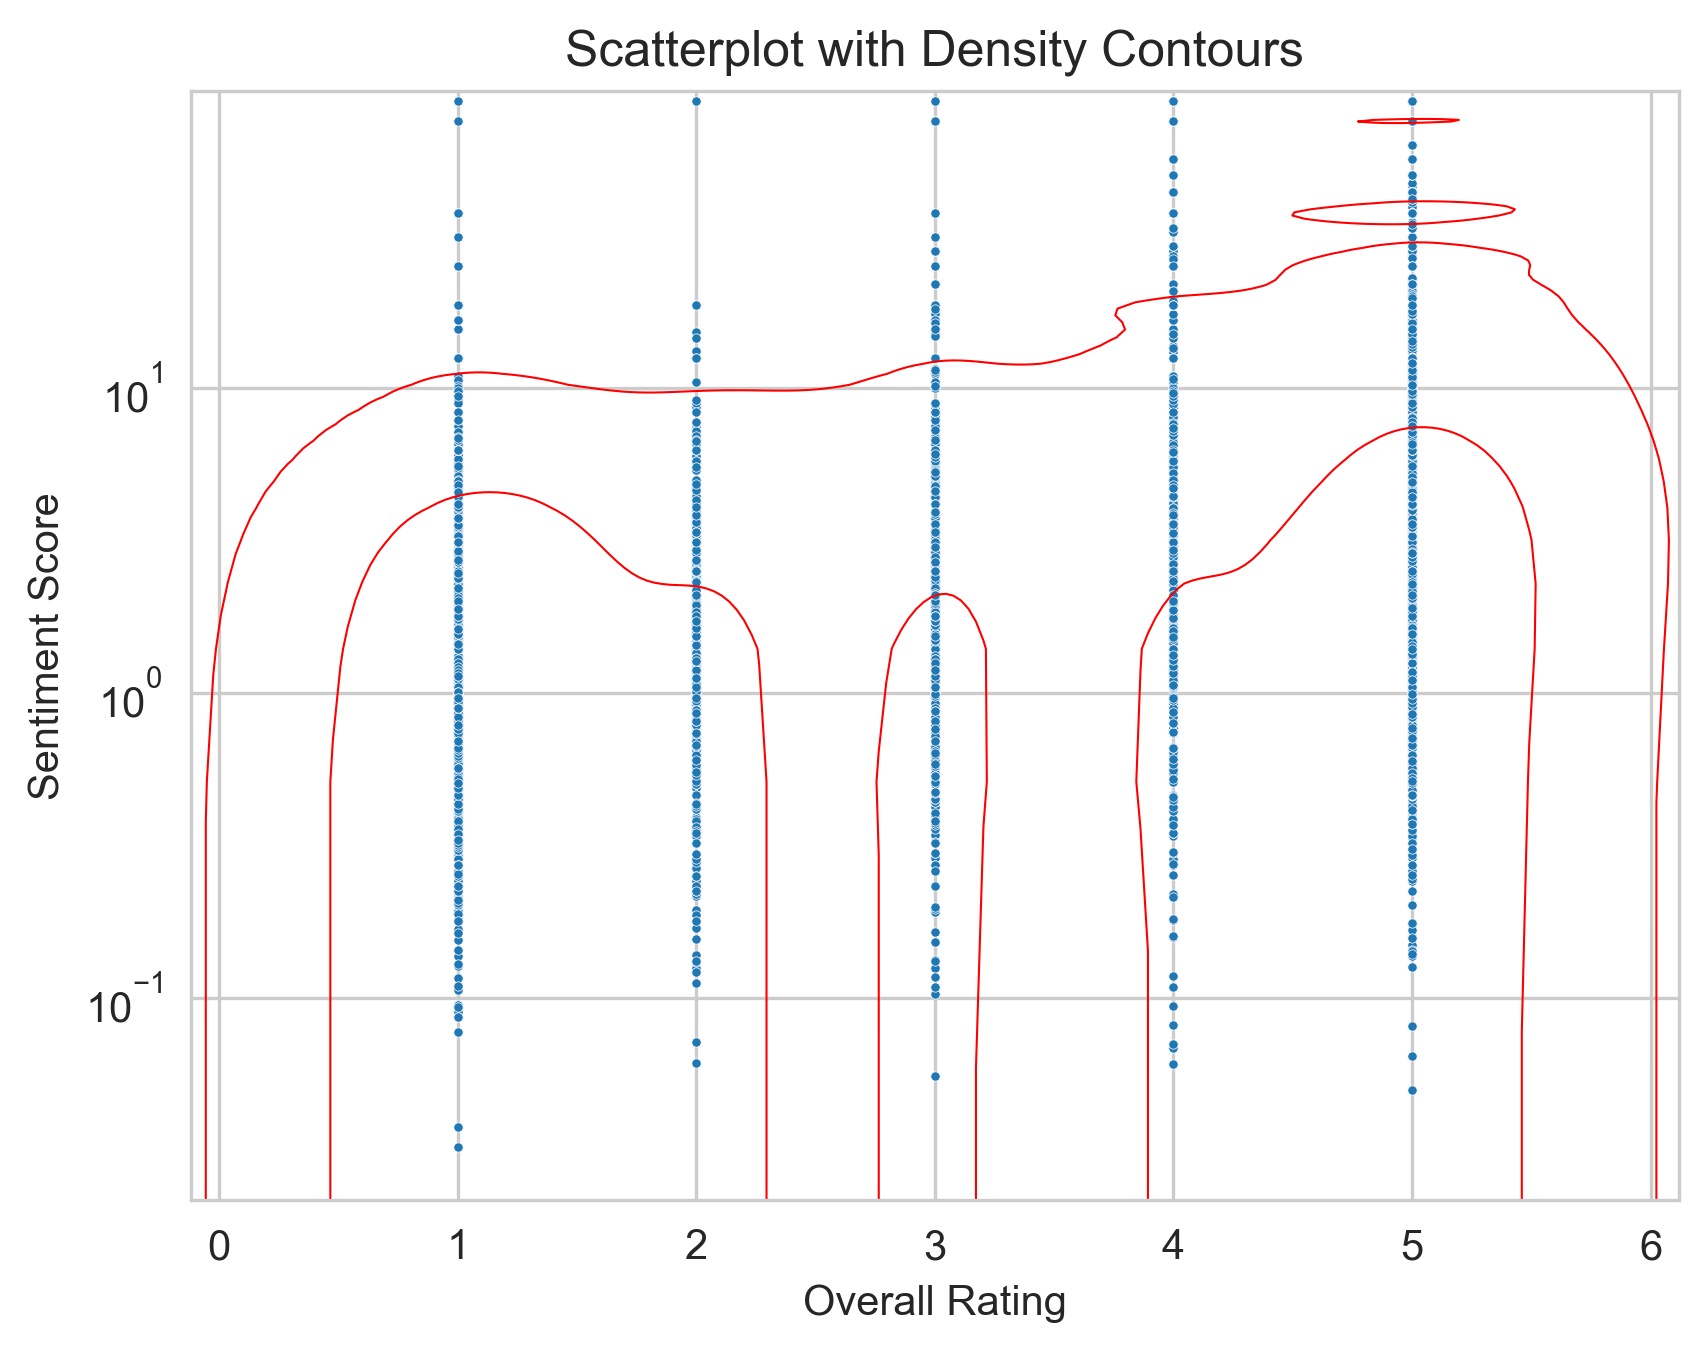

In [42]:
# plotting scatterplot to visualise the correlation
sns.scatterplot(data=df, x ='overall', y = 'sentiment_score', s=5)
sns.kdeplot(data=df, x='overall', y='sentiment_score', levels=3, color='r', linewidths=0.5)
plt.title('Scatterplot with Density Contours')
plt.xlabel('Overall Rating')
plt.ylabel('Sentiment Score')
plt.yscale('log')
plt.show()

We can see a small increase in the sentiment towards positive as the ratings increase, let's investigate the correlation futher